In [66]:

import pandas as pd
import numpy as np 
from sklearn import metrics

# Importation des données et exploration

Dans la première partie, nous voulons faire une exploration des données qui permette :

- identifier les statistiques descriptives de l'ensemble des données.
- Séparer des valeurs Gaussians des valeurs Catégoriques.
- Mieux connaître quelles valeurs seront pertinentes pour utiliser pour chaque les clusters.

In [2]:
df = pd.read_csv('https://raw.githubusercontent.com/jdalfons/Clustering_univ/main/Test_Binome/ex_1/sujet_b_demande_credit.csv', sep=';')
df.head()

,Reason,Marital_status,Title,Spouse_title,Guarantee,Insurance,Housing,Housing_type,Job,Children,Bank_seniority,Wages,Spouse_Wages,Family_count,Income_per_head,Rent,Age,Current_loans,Loan_Length,Refunding
0,Other,Partner,Mrs,Mr,Yes,No,Rent,Flat,Worker,0,5,1260,1520,2,1390,340,24,160,4,Slow
1,Other,Married,Mrs,Mr,Yes,No,Rent,Flat,Skilled Worker,1,17,1807,2579,3,1462,660,38,0,4,Slow
2,TV,Single,Mr,Mrs,Yes,No,Rent,Flat,Worker,0,13,2160,1157,2,1658,0,44,360,4,Slow
3,Mail,Married,Mr,Mrs,Yes,No,Rent,Flat,Retired,0,0,2439,0,2,1220,0,60,440,3,Fast
4,TV,Divorced,Mrs,NaN,No,No,Rent,House,Retired,0,24,589,0,1,589,373,51,120,3,Fast


In [23]:
# connaître les quantités des données
print(f'Shape of DF: {df.shape} \n')

Shape of DF: (1500, 19) 



In [24]:
# Information des types de données  
print(f'Info: {df.info()} \n')


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1500 entries, 0 to 1499
Data columns (total 19 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Reason           1500 non-null   object
 1   Marital_status   1500 non-null   object
 2   Title            1500 non-null   object
 3   Guarantee        1500 non-null   object
 4   Insurance        1500 non-null   object
 5   Housing          1500 non-null   object
 6   Housing_type     1500 non-null   object
 7   Job              1500 non-null   object
 8   Children         1500 non-null   int64 
 9   Bank_seniority   1500 non-null   int64 
 10  Wages            1500 non-null   int64 
 11  Spouse_Wages     1500 non-null   int64 
 12  Family_count     1500 non-null   int64 
 13  Income_per_head  1500 non-null   int64 
 14  Rent             1500 non-null   int64 
 15  Age              1500 non-null   int64 
 16  Current_loans    1500 non-null   int64 
 17  Loan_Length      1500 non-null   

In [25]:
# Colonnes
print(f'Columns: {df.columns} \n')

Columns: Index(['Reason', 'Marital_status', 'Title', 'Guarantee', 'Insurance',
       'Housing', 'Housing_type', 'Job', 'Children', 'Bank_seniority', 'Wages',
       'Spouse_Wages', 'Family_count', 'Income_per_head', 'Rent', 'Age',
       'Current_loans', 'Loan_Length', 'Refunding'],
      dtype='object') 



In [27]:
# Description des données
df.describe()

,Children,Bank_seniority,Wages,Spouse_Wages,Family_count,Income_per_head,Rent,Age,Current_loans,Loan_Length
count,1500.000000,1500.000000,1500.000000,1500.000000,1500.000000,1500.000000,1500.000000,1500.000000,1500.000000,1500.000000
mean,0.897333,13.011333,1792.555333,910.428667,2.549333,1295.525333,331.968667,42.474000,198.172667,3.524667
std,1.150511,8.866545,1089.384958,1245.782118,1.391710,946.062520,351.923467,12.217672,236.757181,0.736039
min,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,20.000000,0.000000,1.000000
25%,0.000000,6.000000,1260.000000,0.000000,1.000000,692.000000,0.000000,33.000000,0.000000,3.000000
50%,0.000000,11.000000,1597.000000,0.000000,2.000000,1160.500000,300.000000,41.000000,143.000000,4.000000
75%,2.000000,20.000000,2060.000000,1570.250000,4.000000,1635.500000,514.250000,50.000000,300.000000,4.000000
max,5.000000,60.000000,10000.000000,12933.000000,7.000000,7831.000000,3200.000000,87.000000,1940.000000,4.000000


## Conclusion

### (Additionnel) connaître les valeurs par variables

In [8]:
for var in df.columns:
    print(f'{var}: {len(df[var].unique())} {df[var].unique()} \n')
    


Reason: 3 ['Other' 'TV' 'Mail'] 

Marital_status: 6 ['Partner' 'Married' 'Single' 'Divorced' 'Separated' 'Widowed'] 

Title: 3 ['Mrs' 'Mr' 'Miss'] 

Guarantee: 2 ['Yes' 'No'] 

Insurance: 2 ['No' 'Yes'] 

Housing: 3 ['Rent' 'Owner' 'Family'] 

Housing_type: 2 ['Flat' 'House'] 

Job: 10 ['Worker' 'Skilled Worker' 'Retired' 'Office employee' 'Teacher'
 'Salesman' 'Executive' 'Non-working' 'Unemployed' 'Employee'] 

Children: 6 [0 1 5 2 3 4] 

Bank_seniority: 45 [ 5 17 13  0 24 15  6  8 10  2 12 20  7 18 30  9 25 32  1  4 21 11 35  3
 33 19 23 14 29 22 16 28 26 39 43 40 27 31 60 38 37 45 48 41 42] 

Wages: 686 [ 1260  1807  2160  2439   589  1770  1779  1160  1621  1320  1218  1044
  2780  2462  2000   850  2860  1600  2108  2001  2364  1700  2517  1900
   981     0  2255  1157  2456  1254  2382  1274  1814  1810  7000  1860
  2320  3940  2583  1420  2887  2710  1740  1443  2915  1300  1781  3030
  1673  1392  1853  1359  1588   560  1633  1344  6128  1438  1220  1950
  2440  2088  1200  

## Separation des valeurs catégoriques et gaussien

In [28]:
# Separe the categorical and gaussian variables
cat_vars = ['Reason', 'Marital_status', 'Title', 'Guarantee', 'Insurance', 'Housing', 'Housing_type', 'Job', 'Refunding']
df_cat_vars = df[cat_vars]
gausian_vars = ['Children','Wages', 'Bank_seniority', 'Spouse_Wages', 'Family_count', 'Income_per_head', 'Rent', 'Age', 'Current_loans', 'Loan_Length']
df_gaussian_vars = df[gausian_vars]

df_cat_vars.head()

,Reason,Marital_status,Title,Guarantee,Insurance,Housing,Housing_type,Job,Refunding
0,Other,Partner,Mrs,Yes,No,Rent,Flat,Worker,Slow
1,Other,Married,Mrs,Yes,No,Rent,Flat,Skilled Worker,Slow
2,TV,Single,Mr,Yes,No,Rent,Flat,Worker,Slow
3,Mail,Married,Mr,Yes,No,Rent,Flat,Retired,Fast
4,TV,Divorced,Mrs,No,No,Rent,House,Retired,Fast


In [29]:
df_gaussian_vars.head()

,Children,Wages,Bank_seniority,Spouse_Wages,Family_count,Income_per_head,Rent,Age,Current_loans,Loan_Length
0,0,1260,5,1520,2,1390,340,24,160,4
1,1,1807,17,2579,3,1462,660,38,0,4
2,0,2160,13,1157,2,1658,0,44,360,4
3,0,2439,0,0,2,1220,0,60,440,3
4,0,589,24,0,1,589,373,51,120,3


## Affichage des valeurs Gaussiens pour mieux visualiser les séparations.

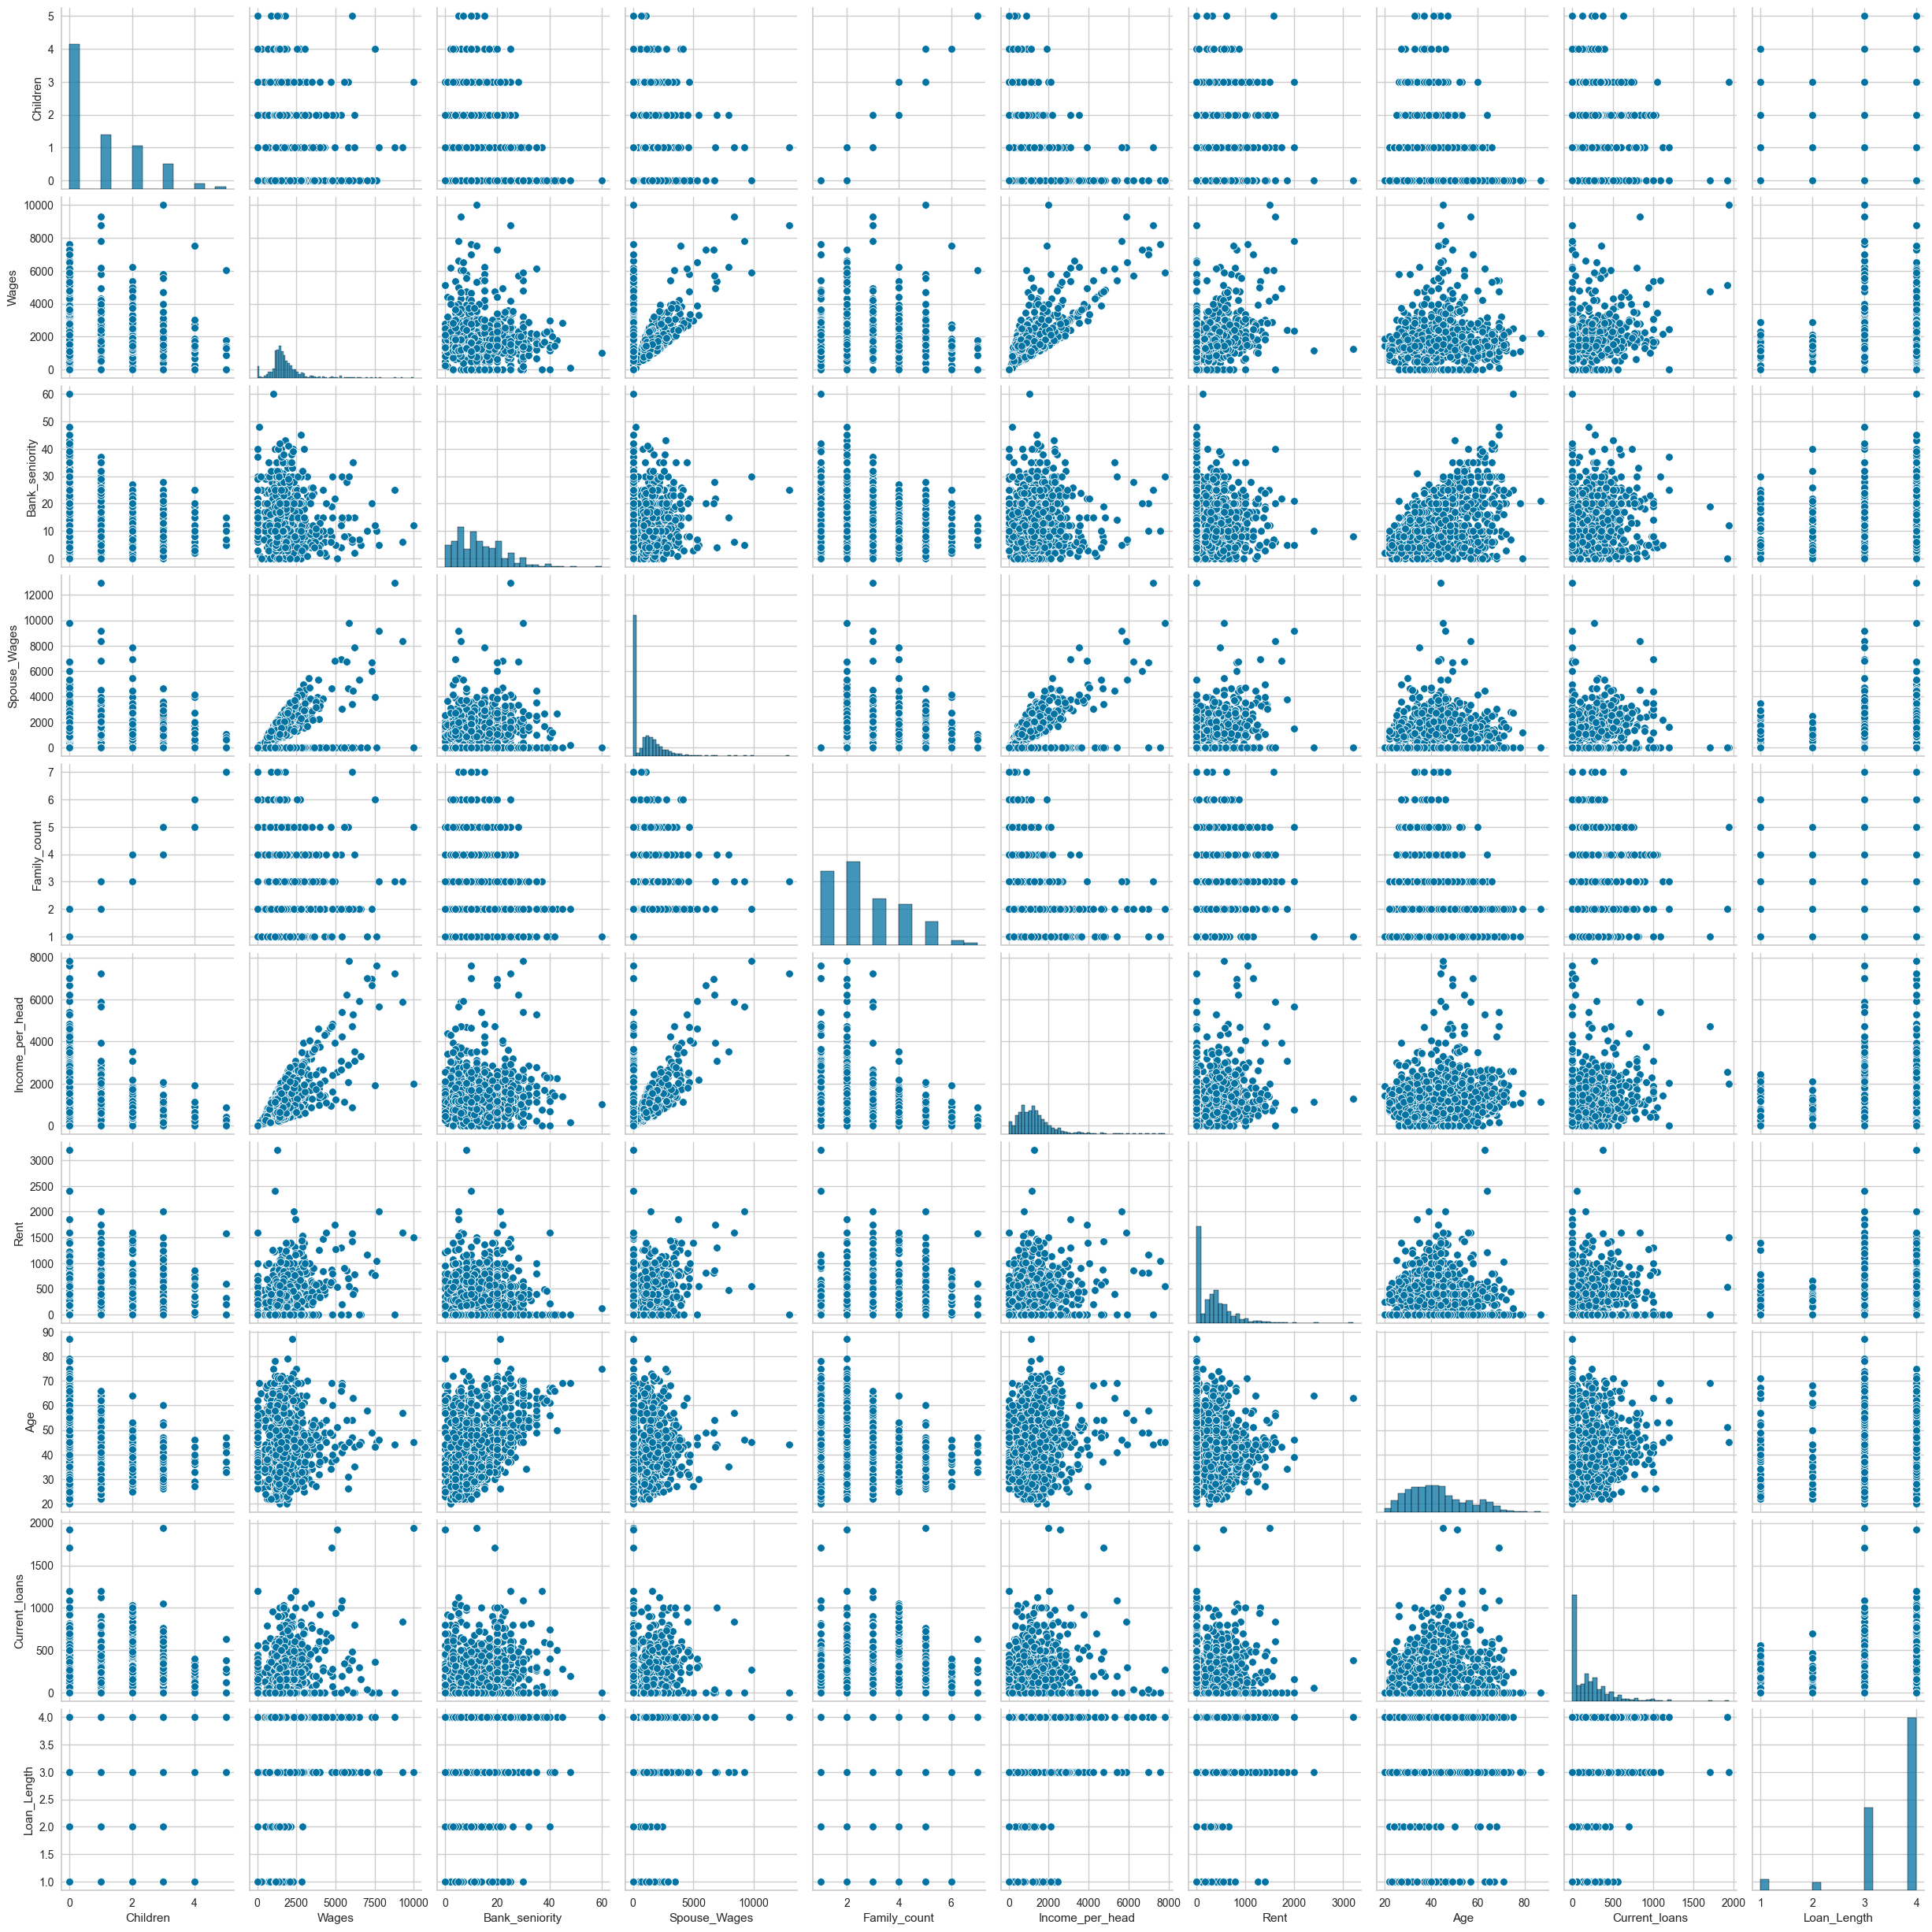

In [34]:
import seaborn as sns
df_gaussian_vars_encoded = pd.get_dummies(df_gaussian_vars, drop_first=True)
sns.pairplot(df_gaussian_vars_encoded)

### Correlations

In [31]:
corr = df_gaussian_vars.corr()
corr

,Children,Wages,Bank_seniority,Spouse_Wages,Family_count,Income_per_head,Rent,Age,Current_loans,Loan_Length
Children,1.000000,-0.031116,-0.101969,0.120399,0.947267,-0.469046,0.251366,-0.265581,0.125948,0.039231
Wages,-0.031116,1.000000,-0.011514,0.411424,-0.026258,0.749221,0.274973,0.108185,0.240867,0.016308
Bank_seniority,-0.101969,-0.011514,1.000000,0.086497,-0.047755,0.049056,-0.058680,0.469527,0.062886,0.097528
Spouse_Wages,0.120399,0.411424,0.086497,1.000000,0.282395,0.429665,0.275776,0.029046,0.137960,0.018509
Family_count,0.947267,-0.026258,-0.047755,0.282395,1.000000,-0.455916,0.285722,-0.204549,0.163076,0.055796
Income_per_head,-0.469046,0.749221,0.049056,0.429665,-0.455916,1.000000,0.081512,0.181175,0.063563,-0.007923
Rent,0.251366,0.274973,-0.058680,0.275776,0.285722,0.081512,1.000000,-0.075756,0.028336,0.025102
Age,-0.265581,0.108185,0.469527,0.029046,-0.204549,0.181175,-0.075756,1.000000,0.030603,0.082045
Current_loans,0.125948,0.240867,0.062886,0.137960,0.163076,0.063563,0.028336,0.030603,1.000000,0.039848
Loan_Length,0.039231,0.016308,0.097528,0.018509,0.055796,-0.007923,0.025102,0.082045,0.039848,1.000000


<Axes: >

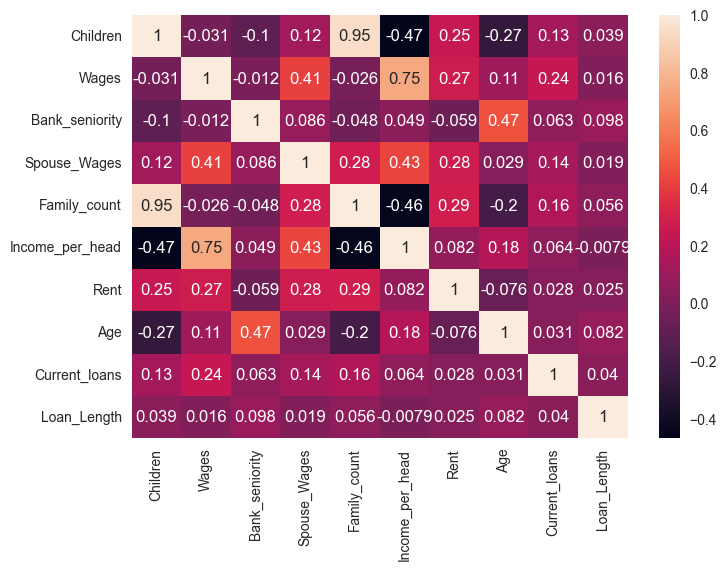

In [32]:

# Correlations heatmap
sns.heatmap(corr, annot=True)

# Models

### Kmeans

#### Encoding each value for standarization

In [40]:
from sklearn.preprocessing import LabelEncoder

# Create an instance of LabelEncoder
encoder = LabelEncoder()

# Encode the categorical variables in df
for var in cat_vars:
    df[var] = encoder.fit_transform(df[var])


In [42]:
df.head()

,Reason,Marital_status,Title,Guarantee,Insurance,Housing,Housing_type,Job,Children,Bank_seniority,Wages,Spouse_Wages,Family_count,Income_per_head,Rent,Age,Current_loans,Loan_Length,Refunding
0,1,2,2,1,0,2,0,9,0,5,1260,1520,2,1390,340,24,160,4,2
1,1,1,2,1,0,2,0,6,1,17,1807,2579,3,1462,660,38,0,4,2
2,2,4,1,1,0,2,0,9,0,13,2160,1157,2,1658,0,44,360,4,2
3,0,1,1,1,0,2,0,4,0,0,2439,0,2,1220,0,60,440,3,0
4,2,0,2,0,0,2,1,4,0,24,589,0,1,589,373,51,120,3,0


In [44]:
for var in df.columns:
    print(f'{var}: {len(df[var].unique())} {df[var].unique()} \n')

Reason: 3 [1 2 0] 

Marital_status: 6 [2 1 4 0 3 5] 

Title: 3 [2 1 0] 

Guarantee: 2 [1 0] 

Insurance: 2 [0 1] 

Housing: 3 [2 1 0] 

Housing_type: 2 [0 1] 

Job: 10 [9 6 4 3 7 5 1 2 8 0] 

Children: 6 [0 1 5 2 3 4] 

Bank_seniority: 45 [ 5 17 13  0 24 15  6  8 10  2 12 20  7 18 30  9 25 32  1  4 21 11 35  3
 33 19 23 14 29 22 16 28 26 39 43 40 27 31 60 38 37 45 48 41 42] 

Wages: 686 [ 1260  1807  2160  2439   589  1770  1779  1160  1621  1320  1218  1044
  2780  2462  2000   850  2860  1600  2108  2001  2364  1700  2517  1900
   981     0  2255  1157  2456  1254  2382  1274  1814  1810  7000  1860
  2320  3940  2583  1420  2887  2710  1740  1443  2915  1300  1781  3030
  1673  1392  1853  1359  1588   560  1633  1344  6128  1438  1220  1950
  2440  2088  1200  1397  1936  1177  1343  1479  1658   623  1228   783
  1601  1510  9300  1440  1460  1318  1369  1285  1829  2230  1786   785
   894  2600  3510  1702  1571  2266  3004  1426  2846  1349  1991  2243
  1660  2960  2336  6042  

In [45]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

df_scaled = scaler.fit_transform(df)
df_scaled = pd.DataFrame(df, columns=df.columns)
df_scaled.describe()



,Reason,Marital_status,Title,Guarantee,Insurance,Housing,Housing_type,Job,Children,Bank_seniority,Wages,Spouse_Wages,Family_count,Income_per_head,Rent,Age,Current_loans,Loan_Length,Refunding
count,1500.000000,1500.000000,1500.000000,1500.00000,1500.000000,1500.000000,1500.000000,1500.000000,1500.000000,1500.000000,1500.000000,1500.000000,1500.000000,1500.000000,1500.000000,1500.000000,1500.000000,1500.000000,1500.000000
mean,1.308000,1.828000,1.400000,0.64000,0.096667,1.828667,0.456000,4.861333,0.897333,13.011333,1792.555333,910.428667,2.549333,1295.525333,331.968667,42.474000,198.172667,3.524667,1.453333
std,0.669404,1.495741,0.634772,0.48016,0.295602,0.465607,0.498226,2.978146,1.150511,8.866545,1089.384958,1245.782118,1.391710,946.062520,351.923467,12.217672,236.757181,0.736039,0.875785
min,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,20.000000,0.000000,1.000000,0.000000
25%,1.000000,1.000000,1.000000,0.00000,0.000000,2.000000,0.000000,3.000000,0.000000,6.000000,1260.000000,0.000000,1.000000,692.000000,0.000000,33.000000,0.000000,3.000000,0.000000
50%,1.000000,1.000000,1.000000,1.00000,0.000000,2.000000,0.000000,4.000000,0.000000,11.000000,1597.000000,0.000000,2.000000,1160.500000,300.000000,41.000000,143.000000,4.000000,2.000000
75%,2.000000,3.000000,2.000000,1.00000,0.000000,2.000000,1.000000,8.000000,2.000000,20.000000,2060.000000,1570.250000,4.000000,1635.500000,514.250000,50.000000,300.000000,4.000000,2.000000
max,2.000000,5.000000,2.000000,1.00000,1.000000,2.000000,1.000000,9.000000,5.000000,60.000000,10000.000000,12933.000000,7.000000,7831.000000,3200.000000,87.000000,1940.000000,4.000000,2.000000


In [46]:
df_scaled.std()

Reason                0.669404
Marital_status        1.495741
Title                 0.634772
Guarantee             0.480160
Insurance             0.295602
Housing               0.465607
Housing_type          0.498226
Job                   2.978146
Children              1.150511
Bank_seniority        8.866545
Wages              1089.384958
Spouse_Wages       1245.782118
Family_count          1.391710
Income_per_head     946.062520
Rent                351.923467
Age                  12.217672
Current_loans       236.757181
Loan_Length           0.736039
Refunding             0.875785
dtype: float64

In [50]:
from sklearn.cluster import KMeans
cluster_kmeans = KMeans(n_clusters=4, random_state=0)
cluster_kmeans.fit(df_scaled)


KMeans(n_clusters=4, random_state=0)

In [51]:
np.unique(cluster_kmeans.labels_, return_counts=True)

(array([0, 1, 2, 3], dtype=int32), array([473, 867,  40, 120]))

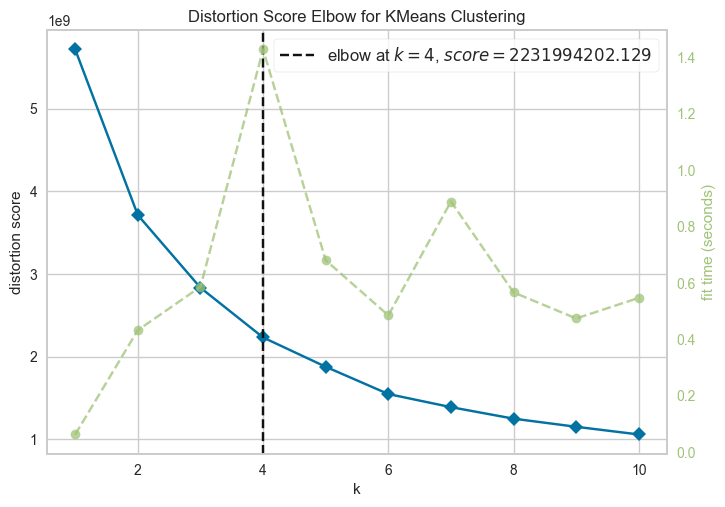

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [52]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

from yellowbrick.cluster import KElbowVisualizer
visualizer = KElbowVisualizer(KMeans(n_init=10),k=(1,11),metric='distortion')
plt.xlabel('Number of clusters, k')
plt.ylabel('Silhouette Score')
plt.title('The Silhouette Method showing the optimal k')
visualizer.fit(df_scaled)
visualizer.show()


In [54]:
#identifier les variables qui impactent le plus la séparabilité
#calcul des carrés des rapports de corrélation

#SCT = n * la variance
# etpuisque les vaiables sont centrées et réduites
SCT = df_scaled.shape[0]


effectif = np.unique(cluster_kmeans.labels_, return_counts=True)
effectif = list(effectif[1])
print("number of elements by cluster = " ,effectif)


#SCE de chaque variable, sachant qu'elles sont centrées
SCE = np.dot(effectif,cluster_kmeans.cluster_centers_**2)

#carré du rapport de corrélation
eta2 = SCE / SCT

#transformer en series pour une présentation plus avenante
eta2S = pd.Series(eta2)
eta2S.index = df_scaled.columns
print(eta2S.sort_values(ascending=False))


number of elements by cluster =  [473, 867, 40, 120]
Wages              3.892438e+06
Income_per_head    2.176620e+06
Spouse_Wages       1.960259e+06
Rent               1.183832e+05
Current_loans      4.232017e+04
Age                1.806459e+03
Bank_seniority     1.698672e+02
Job                2.388916e+01
Loan_Length        1.242352e+01
Family_count       6.678223e+00
Marital_status     3.593040e+00
Housing            3.344724e+00
Refunding          2.122571e+00
Title              1.971818e+00
Reason             1.711789e+00
Children           8.383838e-01
Guarantee          4.735666e-01
Housing_type       2.100005e-01
Insurance          9.537199e-03
dtype: float64


# Conclusion

<Axes: xlabel='Wages', ylabel='Current_loans'>

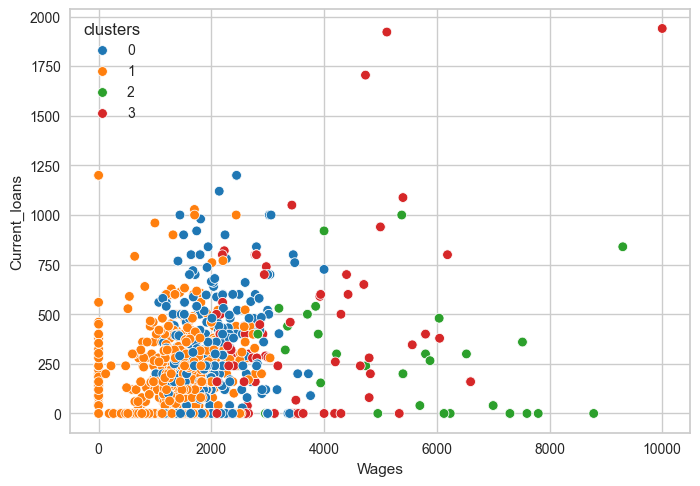

In [58]:

#df temporaire avec la colonne supp.
dfTemp = df.copy()
dfTemp['clusters'] = cluster_kmeans.labels_

#graphique - couple de variables et groupes
# sns.pairplot(dfTemp,hue='clusters',palette='tab10')
sns.scatterplot(data=dfTemp, x='Wages', y='Current_loans', hue='clusters', palette='tab10')


## Interpretation des clusters

In [59]:
#croiser chaque variable avec les groupes
for v in df.columns:
    print("{}<< {} >>".format('\n',v.upper()))
    print(pd.crosstab(index=df[v],columns=cluster_kmeans.labels_,normalize='columns'))


<< REASON >>
col_0          0         1      2         3
Reason                                     
0       0.141649  0.113033  0.050  0.075000
1       0.443975  0.444060  0.525  0.583333
2       0.414376  0.442907  0.425  0.341667

<< MARITAL_STATUS >>
col_0                  0         1      2         3
Marital_status                                     
0               0.012685  0.121107  0.000  0.225000
1               0.892178  0.437140  0.825  0.216667
2               0.071882  0.057670  0.075  0.008333
3               0.000000  0.040369  0.000  0.041667
4               0.023256  0.256055  0.100  0.391667
5               0.000000  0.087659  0.000  0.116667

<< TITLE >>
col_0         0         1     2         3
Title                                    
0      0.008457  0.115340  0.05  0.133333
1      0.441860  0.408304  0.65  0.558333
2      0.549683  0.476355  0.30  0.308333

<< GUARANTEE >>
col_0             0         1      2         3
Guarantee                                

# Conclusion

# mesure d'évaluation

Sur le prochain processus, on va vérifier la mesure entre les clusters choisisse et la deuxième choix pour K considérer la plus pertinente, a fins d'identifier quel sera la meilleure choix.

In [71]:
from sklearn.cluster import KMeans
cluster_kmeans_evaluation = KMeans(n_clusters=5, random_state=0)
cluster_kmeans_evaluation.fit(df_scaled)

KMeans(n_clusters=5, random_state=0)

In [69]:
# Inerties totale

XC = df_scaled - np.mean(df_scaled, axis=0)
CARDIST = np.sum(XC**2, axis=1)
TSS = np.sum(CARDIST)
print('TSS = ',TSS)

TSS =  5717060457.903334


In [72]:
# Inerties expliques
print((TSS - cluster_kmeans.inertia_)/TSS)
print((TSS - cluster_kmeans_evaluation.inertia_)/TSS)

0.608711819945225
0.6709502504666258


In [74]:
print(metrics.calinski_harabasz_score(df_scaled, cluster_kmeans.labels_))
print(metrics.calinski_harabasz_score(df_scaled, cluster_kmeans_evaluation.labels_))

775.7563598527137
762.1078266455532


In [75]:
print(metrics.silhouette_score(df_scaled, cluster_kmeans.labels_))
print(metrics.silhouette_score(df_scaled, cluster_kmeans_evaluation.labels_))

0.38168025531807614
0.3345960638526358


# Conclusion

## Creating Pipeline

In [ ]:
from sklearn import cluster
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
k = 4
cluster_kmeans = cluster.KMeans(n_clusters=k, random_state=0, n_init=10)
# Define the steps in the pipeline
steps = [
    ('scaler', StandardScaler()),
    ('kmeans', KMeans(n_clusters=4, random_state=0, n_init=10))
]

# Create the pipeline
pipeline = Pipeline(steps)
cluster_kmeans.fit(df)

## Saving Cluster pipeline

In [ ]:
#check -- version de scikit-learn
import sklearn
sklearn.__version__

In [ ]:
#sauvegarde du modèle
import pickle

#créer le fichier en écriture binaire
f = open("workflow.sav","wb")

#sérialisation
pickle.dump(cluster_kmeans,f)

#ne pas oublier de ferme
f.close()